In [1]:
import os
import pandas as pd

import flowkit as fk

%matplotlib inline

### Load FlowJo Workspace

In [2]:
base_dir = "8_color_data_set"

sample_path = os.path.join(base_dir, "fcs_files")
wsp_path = os.path.join(base_dir, "8_color_ICS.wsp")

In [3]:
fks_fj = fk.Session(sample_path)
fks_fj.import_flowjo_workspace(wsp_path)

In [4]:
fks_fj.get_sample_ids()

['101_DEN084Y5_15_E03_009_clean.fcs',
 '101_DEN084Y5_15_E01_008_clean.fcs',
 '101_DEN084Y5_15_E05_010_clean.fcs']

In [5]:
fks_fj.get_sample_groups()

['default', 'All Samples', 'DEN']

#### Record our sample ID and sample group for later

In [6]:
sample_id = '101_DEN084Y5_15_E03_009_clean.fcs'
sample_grp = 'DEN'

In [7]:
sample = fks_fj.get_sample(sample_id)

In [8]:
sample.channels

{'1': {'PnN': 'FSC-A'},
 '2': {'PnN': 'FSC-H'},
 '3': {'PnN': 'FSC-W'},
 '4': {'PnN': 'SSC-A'},
 '5': {'PnN': 'SSC-H'},
 '6': {'PnN': 'SSC-W'},
 '7': {'PnN': 'TNFa FITC FLR-A'},
 '8': {'PnN': 'CD8 PerCP-Cy55 FLR-A'},
 '9': {'PnN': 'IL2 BV421 FLR-A'},
 '10': {'PnN': 'Aqua Amine FLR-A'},
 '11': {'PnN': 'IFNg APC FLR-A'},
 '12': {'PnN': 'CD3 APC-H7 FLR-A'},
 '13': {'PnN': 'CD107a PE FLR-A'},
 '14': {'PnN': 'CD4 PE-Cy7 FLR-A'},
 '15': {'PnN': 'Time'}}

#### Show the gate hierachy

In [9]:
print(fks_fj.get_gate_hierarchy(sample_grp, 'ascii'))

root
╰── Time
    ╰── Singlets
        ╰── aAmine-
            ╰── CD3+
                ├── CD4+
                │   ├── CD107a+
                │   ├── IFNg+
                │   ├── IL2+
                │   ╰── TNFa+
                ╰── CD8+
                    ├── CD107a+
                    ├── IFNg+
                    ├── IL2+
                    ╰── TNFa+


#### Apply the gating strategy for the sample group

In [10]:
fks_fj.analyze_samples(sample_grp)

In [11]:
results = fks_fj.get_gating_results(sample_grp, sample_id)

In [12]:
results.report

gate_path  \
sample                            gate_id                                                 
101_DEN084Y5_15_E03_009_clean.fcs Time                                           [root]   
                                  Singlets                                 [root, Time]   
                                  aAmine-                        [root, Time, Singlets]   
                                  CD3+                  [root, Time, Singlets, aAmine-]   
                                  CD4+            [root, Time, Singlets, aAmine-, CD3+]   
                                  CD8+            [root, Time, Singlets, aAmine-, CD3+]   
                                  CD107a+   [root, Time, Singlets, aAmine-, CD3+, CD4+]   
                                  CD107a+   [root, Time, Singlets, aAmine-, CD3+, CD8+]   
                                  IFNg+     [root, Time, Singlets, aAmine-, CD3+, CD4+]   
                                  IFNg+     [root, Time, Singlets, aAmine-, CD3+, CD8+]   
                                  IL2+      [root, Time, Singlets, aAmine-, CD3+, CD4+]   
                                  IL2+      [root, Time, Singlets, aAmine-, CD3+, CD8+]   
                                  TNFa+     [root, Time, Singlets, aAmine-, CD3+, CD4+]   
                                  TNFa+     [root, Time, Singlets, aAmine-, CD3+, CD8+]   

                                                gate_type quadrant_parent  \
sample                            gate_id                                   
101_DEN084Y5_15_E03_009_clean.fcs Time      RectangleGate            None   
                                  Singlets    PolygonGate            None   
                                  aAmine-     PolygonGate            None   
                                  CD3+        PolygonGate            None   
                                  CD4+        PolygonGate            None   
                                  CD8+        PolygonGate            None   
                                  CD107a+   RectangleGate            None   
                                  CD107a+   RectangleGate            None   
                                  IFNg+     RectangleGate            None   
                                  IFNg+     RectangleGate            None   
                                  IL2+      RectangleGate            None   
                                  IL2+      RectangleGate            None   
                                  TNFa+     RectangleGate            None   
                                  TNFa+     RectangleGate            None   

                                              parent   count  \
sample                            gate_id                      
101_DEN084Y5_15_E03_009_clean.fcs Time          None  283968   
                                  Singlets      Time  236780   
                                  aAmine-   Singlets  161823   
                                  CD3+       aAmine-  132200   
                                  CD4+          CD3+   81855   
                                  CD8+          CD3+   46965   
                                  CD107a+       CD4+      59   
                                  CD107a+       CD8+     814   
                                  IFNg+         CD4+     598   
                                  IFNg+         CD8+    1224   
                                  IL2+          CD4+      64   
                                  IL2+          CD8+     127   
                                  TNFa+         CD4+     288   
                                  TNFa+         CD8+     821   

                                            absolute_percent  \
sample                            gate_id                      
101_DEN084Y5_15_E03_009_clean.fcs Time             99.999648   
                                  Singlets         83.382341   
                                  aAmine-          56.986150   
                                  CD3+     

#### Get gated events for a sample

In [13]:
# first get a compensation matrix and transform to use for gated events
comps = fks_fj.get_sample_comp_matrices(sample_grp, sample_id)
xforms = fks_fj.get_sample_transforms(sample_grp, sample_id)

In [14]:
comps, xforms

([Matrix(Acquisition-defined, dims: 8)],
 [LinearTransform(FSC-A, t: 262144.0, a: 0.0),
  LinearTransform(FSC-H, t: 262144.0, a: 0.0),
  LinearTransform(FSC-W, t: 262144.0, a: 0.0),
  LinearTransform(SSC-A, t: 262144.0, a: 0.0),
  LinearTransform(SSC-H, t: 262144.0, a: 0.0),
  LinearTransform(SSC-W, t: 262144.0, a: 0.0),
  LogicleTransform(TNFa FITC FLR-A, t: 262144.0, w: 1.0, m: 4.418539922, a: 0.0),
  LogicleTransform(CD8 PerCP-Cy55 FLR-A, t: 262144.0, w: 1.0, m: 4.418539922, a: 0.0),
  LogicleTransform(IL2 BV421 FLR-A, t: 262144.0, w: 1.0, m: 4.418539922, a: 0.0),
  LogicleTransform(Aqua Amine FLR-A, t: 262144.0, w: 1.0, m: 4.418539922, a: 0.0),
  LogicleTransform(IFNg APC FLR-A, t: 262144.0, w: 1.0, m: 4.418539922, a: 0.0),
  LogicleTransform(CD3 APC-H7 FLR-A, t: 262144.0, w: 1.0, m: 4.418539922, a: 0.0),
  LogicleTransform(CD107a PE FLR-A, t: 262144.0, w: 1.0, m: 4.418539922, a: 0.0),
  LogicleTransform(CD4 PE-Cy7 FLR-A, t: 262144.0, w: 1.0, m: 4.418539922, a: 0.0),
  LinearTransf

In [15]:
comp = comps[0]
xform = xforms[6]

In [16]:
cd4_gate_id = 'CD4+'
cd4_events = fks_fj.get_gate_events(sample_grp, sample_id, cd4_gate_id, matrix=comp, transform=xform)

/home/swhite/envs/py3-flowkit-dev/lib/python3.8/site-packages/FlowKit-0.6.0-py3.8-linux-x86_64.egg/flowkit/_models/gating_results.py:102: PerformanceWarning: indexing past lexsort depth may impact performance.
  gate_series = self.report.loc[(self.sample_id, gate_id)]


In [17]:
sample.event_count, len(cd4_events)

(283969, 81855)

In [18]:
cd4_events

pnn,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,TNFa FITC FLR-A,CD8 PerCP-Cy55 FLR-A,IL2 BV421 FLR-A,Aqua Amine FLR-A,IFNg APC FLR-A,CD3 APC-H7 FLR-A,CD107a PE FLR-A,CD4 PE-Cy7 FLR-A,Time
pns,,,,,,,,,,,,,,,
1,126964.851562,104289.0,79785.687500,46916.937500,43493.0,70695.250000,0.242188,0.230791,0.282167,0.254901,0.244743,0.454572,0.276832,0.610560,1.294000
6,225004.640625,187028.0,78843.296875,42127.019531,39312.0,70228.843750,0.255704,0.297297,0.270034,0.259815,0.232809,0.383849,0.272156,0.476992,1.308000
7,130944.875000,102041.0,84099.562500,42157.621094,39005.0,70833.023438,0.542186,0.298411,0.430466,0.270496,0.720327,0.324062,0.353662,0.604535,1.309000
9,112081.250000,90787.0,80907.578125,47678.878906,44339.0,70472.570312,0.256053,0.305138,0.332638,0.251144,0.226288,0.607199,0.369072,0.423495,1.311000
16,138395.359375,108988.0,83219.062500,27065.699219,25292.0,70131.976562,0.241784,0.235227,0.283300,0.246906,0.251326,0.454224,0.306893,0.487684,1.324000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283956,141566.421875,114792.0,80821.804688,26316.000000,25000.0,68985.820312,0.234678,0.232605,0.255370,0.244074,0.234512,0.477591,0.251644,0.517704,72.232002
283958,146033.078125,115196.0,83079.484375,43210.257812,37448.0,75620.257812,0.246480,0.238143,0.301098,0.276242,0.247809,0.463633,0.575190,0.558660,72.232998
283961,139303.078125,119136.0,76629.789062,53711.160156,49696.0,70830.945312,0.254001,0.265316,0.312502,0.256775,0.264190,0.486896,0.264077,0.633769,72.233999


In [19]:
cd4_mfi = cd4_events.mean()

In [20]:
cd4_mfi = cd4_mfi[sample.fluoro_indices]

In [21]:
cd4_mfi

pnn                   pns
TNFa FITC FLR-A              0.248338
CD8 PerCP-Cy55 FLR-A         0.274010
IL2 BV421 FLR-A              0.288348
Aqua Amine FLR-A             0.250962
IFNg APC FLR-A               0.246429
CD3 APC-H7 FLR-A             0.488177
CD107a PE FLR-A              0.279935
CD4 PE-Cy7 FLR-A             0.588879
dtype: float64

#### Let's compare MFI between CD4+ & CD8+

In [22]:
cd8_gate_id = 'CD8+'
cd8_events = fks_fj.get_gate_events(sample_grp, sample_id, cd8_gate_id, matrix=comp, transform=xform)
cd8_mfi = cd8_events.mean()[sample.fluoro_indices]

/home/swhite/envs/py3-flowkit-dev/lib/python3.8/site-packages/FlowKit-0.6.0-py3.8-linux-x86_64.egg/flowkit/_models/gating_results.py:102: PerformanceWarning: indexing past lexsort depth may impact performance.
  gate_series = self.report.loc[(self.sample_id, gate_id)]


In [23]:
mfi_comp = pd.DataFrame([cd4_mfi, cd8_mfi], index=[cd4_gate_id, cd8_gate_id])

In [24]:
mfi_comp

pnn,TNFa FITC FLR-A,CD8 PerCP-Cy55 FLR-A,IL2 BV421 FLR-A,Aqua Amine FLR-A,IFNg APC FLR-A,CD3 APC-H7 FLR-A,CD107a PE FLR-A,CD4 PE-Cy7 FLR-A
pns,,,,,,,,
CD4+,0.248338,0.274010,0.288348,0.250962,0.246429,0.488177,0.279935,0.588879
CD8+,0.250975,0.584248,0.283504,0.251208,0.252061,0.459689,0.292997,0.308986


In [25]:
mfi_comp = mfi_comp.transpose().droplevel('pns').reset_index()

In [26]:
mfi_comp

,pnn,CD4+,CD8+
0,TNFa FITC FLR-A,0.248338,0.250975
1,CD8 PerCP-Cy55 FLR-A,0.274010,0.584248
2,IL2 BV421 FLR-A,0.288348,0.283504
3,Aqua Amine FLR-A,0.250962,0.251208
4,IFNg APC FLR-A,0.246429,0.252061
5,CD3 APC-H7 FLR-A,0.488177,0.459689
6,CD107a PE FLR-A,0.279935,0.292997
7,CD4 PE-Cy7 FLR-A,0.588879,0.308986


[]

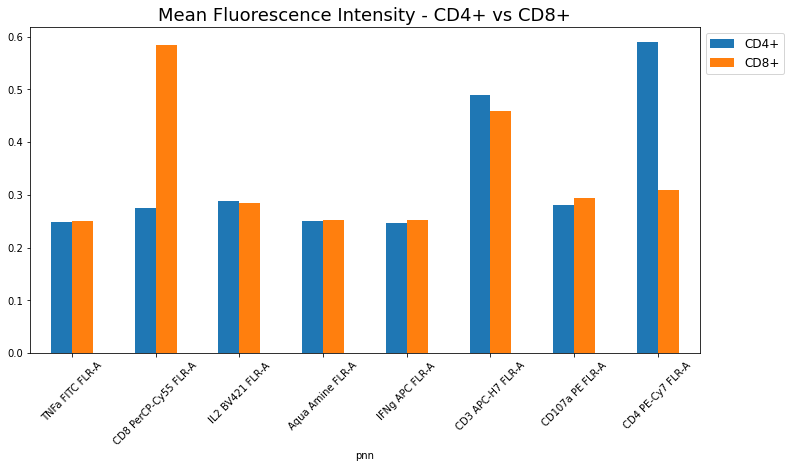

In [27]:
ax = mfi_comp.plot.bar(x='pnn', figsize=(12, 6))
ax.set_title("Mean Fluorescence Intensity - CD4+ vs CD8+", color='black', fontsize=18)
ax.legend(bbox_to_anchor=(1.0, 1.0), fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.plot()